<a href="https://colab.research.google.com/github/luqmansen/notebook-collection/blob/master/Austin_zoning_CNN_TPU_runtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab Notebooks/CNN-austin-zoning'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/CNN-austin-zoning


In [93]:
!wget 'https://storage.googleapis.com/kaggle-data-sets/8857/12355/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe%2B2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5%2BNZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhzXUR%2BwFcNPHIYvj6SdKoGRLqtwq%2FaBV%2B4ZnXWTaPlUX9v9NVt7afFhcNoRE%2FJuhXpFNOeTFDKZmm%2B3zRoBYhg6p1Ma%2F4B9ZsB1Qbhj88LSJqzm6Xqwup3vBpnZl7vL2U9fUkcvt9Kjt00JWv%2FxZzOI666nsFpmSLMn006pHL4hm1hh4ASMQwft%2BUOF%2FxY1U427pLg7f9Nvk9spmMSPPA%3D%3D&response-content-disposition=attachment%3B+filename%3Daustin-zoning-satellite-images.zip'

The name is too long, 544 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe+2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5+NZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhz.
--2020-04-16 03:06:10--  https://storage.googleapis.com/kaggle-data-sets/8857/12355/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe%2B2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5%2BNZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhzXUR%2BwFcNPHIYvj6SdKoGRLqtwq%2FaBV%2B4ZnXWTaPlUX9v9NVt7afFhcNoRE%2FJuhXpFNOeTFDKZmm%2B3zRoBYhg6p1Ma%2F4B9ZsB1Qbhj88LSJqzm6Xqwup3vBpnZl7vL2U9fUkcvt9Kjt00JWv%2FxZzOI666nsFpmSLMn006pHL4hm1hh4ASMQwft%2BUOF%2FxY1U427pLg7f9Nvk9spmMSPPA%3D%3D&response-content-disposition=attachment%3B+filename%3Daustin-zoning-satellite-images.zip
Resolving storage.googleapis.com (

In [94]:
!unzip -q archive*

caution: filename not matched:  archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe+2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5+NZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhz.1
caution: filename not matched:  archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe+2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5+NZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhz.2

1 archive had fatal errors.


In [0]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys
import numpy as np
COPY_STATUS = False

In [0]:
train_dir = 'train_dir/'
src_dir = 'data/'
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

In [97]:
labels = pd.read_csv("data/austin.csv", index_col=0)
labels = labels.drop('zoning_id',1)
labels

,image_name,zoning_zty
0,data/austin_0.jpg,PUD
1,data/austin_1.jpg,PUD
2,data/austin_2.jpg,I-RR
3,data/austin_3.jpg,PUD
4,data/austin_4.jpg,PUD
...,...,...
3662,data/austin_3662.jpg,PUD
3663,data/austin_3663.jpg,PUD
3664,data/austin_3664.jpg,PUD
3665,data/austin_3665.jpg,PUD


In [0]:
if COPY_STATUS is True:
  for filename, zoning_class in labels.values:
    filename = filename.replace('data/','')
    zoning_class = zoning_class.replace('/','~')

    if not os.path.exists(train_dir + zoning_class):
      os.mkdir(train_dir + zoning_class)
    
    src_path = src_dir + filename
    dst_path = train_dir + zoning_class + "/" + filename

    try:
      shutil.copy(src_path, dst_path)
    except IOError as e:
      print('Unable to copy file {} to {}, error {}'.format(src_path, dst_path, e))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
                .format(src_path, dst_path, sys.exc_info()))

In [99]:
!apt install tree && tree -d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
.
├── data
│   └── data
└── train_dir
    ├── AG
    ├── AG-NP
    ├── AV
    ├── CBD
    ├── CH
    ├── CH-CO
    ├── CH-NP
    ├── CH-PDA
    ├── CR
    ├── CR-CO
    ├── CS
    ├── CS-1
    ├── CS-1-CO-NP
    ├── CS-1-H
    ├── CS-1-MU-CO-NP
    ├── CS-1-V-NP
    ├── CS-CO
    ├── CS-CO-MU-NP
    ├── CS-CO-NP
    ├── CS-MU-CO
    ├── CS-MU-CO-NP
    ├── CS-MU-NP
    ├── CS-MU-V-CO-NP
    ├── CS-MU-V-NP
    ├── CS-NP
    ├── CS-V
    ├── CS-V-CO-NP
    ├── CS-V-NCCD-NP
    ├── CS-V-NP
    ├── DMU-CO
    ├── DMU-H-CO
    ├── DR
    ├── DR-NP
    ├── ERC
    ├── GO
    ├── GO-CO
    ├── GO-CO-NP
    ├── GO-MU-CO
    ├── GO-MU-CO-NP
    ├── GO-MU-NP
    ├── GO-MU-V-NP
    ├── GO-NP
    ├── GR
    ├── GR-CO
    ├── GR-CO-NP
    ├── GR-MU
    ├── GR-MU-CO
    ├── GR-MU-CO-NP
    ├── GR-

Arsitektur Keras untuk Multi-label classification
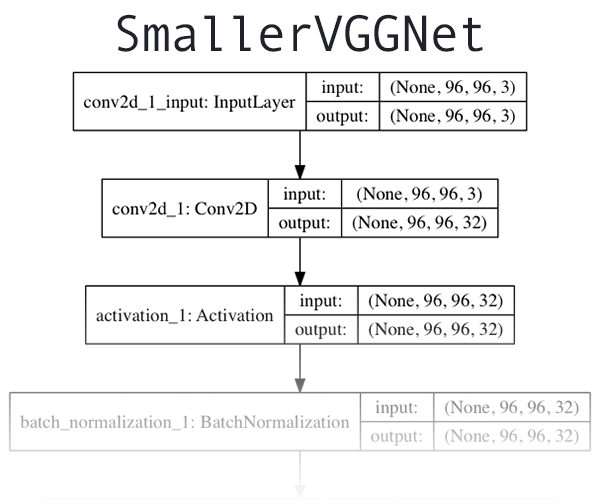

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
os.environ['KERAS_BACKEND'] = 'theano'

In [101]:
tf.test.gpu_device_name()

''

In [0]:
class SmallerVGGNet:
  @staticmethod
  def build(width, height, depth, classes, finalAct="softmax"):

    model = tf.keras.Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
      chanDim = 1

    
    # CONV => RELU => POOL
    # 32 filter dengan kernel 3x3
    model.add(Conv2D(32, (3, 3), padding="same",
      input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
  
    # (CONV => RELU) * 2 => POOL
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
      # (CONV => RELU) * 2 => POOL
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # use a *softmax* activation for single-label classification
    # and *sigmoid* activation for multi-label classification
    model.add(Dense(classes))
    model.add(Activation(finalAct))
    
    # return the constructed network architecture
    return model

Untuk training

In [0]:
import matplotlib
matplotlib.use("Agg")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [0]:
EPOCHS = 200
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)


In [0]:
imagePaths = sorted(list(paths.list_images(train_dir)))
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []

In [0]:
if not os.path.isfile('processed_data.npy') and not os.path.isfile('processed_labels.npy'):
  for (i, imagePath) in enumerate(imagePaths):
      
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    l = label = imagePath.split(os.path.sep)[-2]
    labels.append(l)
    if i > 0 and i % 500 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

  np.save('processed_data.npy', data)
  np.save('processed_labels.npy', labels)

In [0]:
data = np.load('processed_data.npy')
labels = np.load('processed_labels.npy')

In [108]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(	data.nbytes / (1024 * 1000.0)))
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.3, random_state=42)

print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(trainX.shape, trainY.shape, testX.shape, testY.shape))

[INFO] data matrix: 792.07MB
x_train: (2566, 96, 96, 3), y_train: (2566,), x_val: (1101, 96, 96, 3), y_val: (1101,)


In [0]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

In [110]:
print("[INFO] compiling model...")
model = SmallerVGGNet.build(
    width=IMAGE_DIMS[1],
    height=IMAGE_DIMS[0],
    depth=IMAGE_DIMS[2],
    classes=len(lb.classes_))

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"])
model.summary()

[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 64)   

In [111]:
!pip install tensorflow==1.11.0
import tensorflow as tf
print(tf.__version__)

1.11.0


In [112]:
tf.__version__

'1.11.0'

In [114]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

Using Theano backend.


In [115]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)

INFO:tensorflow:Querying Tensorflow master (b'grpc://10.27.235.234:8470') for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 9188806567086031006)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 17376295210482747412)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 5293300858708182431)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 5530814211612836741)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 15588882759878276906)
INFO:tensorflow:*** Available Device: _DeviceAttribu

ValueError: ignored

In [0]:
tpu_model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

In [0]:
def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, trainX.shape[0] - batch_size)
    yield trainX[offset:offset+batch_size], trainY[offset:offset + batch_size]

In [117]:
import time
print("[INFO] training network...")
start_time = time.time()
batch_size=1024
history = tpu_model.fit_generator(
     aug.flow(trainX, trainY, batch_size=batch_size),
    epochs=EPOCHS,
    validation_data=(testX, testY),
    steps_per_epoch=np.ceil(trainX.shape[0]/batch_size),
    verbose=1)
print("[INFO] Elapsed time : %s seconds" % (time.time() - start_time))

[INFO] training network...
Epoch 1/200


AssertionError: ignored

In [0]:
# save the model to disk
print("[INFO] serializing network...")
model.save("result.model")
# save the label binarizer to disk
print("[INFO] serializing label binarizer...")
f = open("label.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

In [0]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("loss.jpg")

In [0]:
from IPython.display import Image
Image(filename='loss.jpg', width=700, height=500) 